In [88]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import plotly.io as pio
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.simplefilter("ignore")

In [89]:
df = pd.read_csv('heart_2022_no_nans.csv')

In [90]:
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


***Data Exploration***

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246022 non-null  object 
 1   Sex                        246022 non-null  object 
 2   GeneralHealth              246022 non-null  object 
 3   PhysicalHealthDays         246022 non-null  float64
 4   MentalHealthDays           246022 non-null  float64
 5   LastCheckupTime            246022 non-null  object 
 6   PhysicalActivities         246022 non-null  object 
 7   SleepHours                 246022 non-null  float64
 8   RemovedTeeth               246022 non-null  object 
 9   HadHeartAttack             246022 non-null  object 
 10  HadAngina                  246022 non-null  object 
 11  HadStroke                  246022 non-null  object 
 12  HadAsthma                  246022 non-null  object 
 13  HadSkinCancer              24

In [93]:
df.duplicated().sum()

9

In [94]:
df.drop_duplicates(inplace=True)

In [95]:
df.duplicated().sum()

0

***EDA&INSIGHTS***

In [97]:
fig = px.bar(df['AgeCategory'][df['HadHeartAttack'] == 'Yes'].value_counts(),
             color = df['AgeCategory'][df['HadHeartAttack'] == 'Yes'].value_counts().index,
             template = 'plotly_dark',
             title = 'Most age category who has heart disease ',
             labels = {'value':'Count'},
             text_auto = True
             )
pio.renderers.default = 'iframe'
fig.show()

In [98]:
val=df['Sex'][df['HadHeartAttack']=='Yes'].value_counts().values
index=df['Sex'][df['HadHeartAttack']=='Yes'].value_counts().index
fig = px.pie(values=val,names=index,template='plotly_dark',title='Is Sex affect on heart disease ?').update_traces(textinfo='label+percent')
fig.show()

In [99]:
val=df['GeneralHealth'][df['HadHeartAttack']=='Yes'].value_counts().values
index=df['GeneralHealth'][df['HadHeartAttack']=='Yes'].value_counts().index
fig = px.pie(values=val,names=index,template='plotly_dark',title='Is general health effect on Heart disease ?').update_traces(textinfo='label+percent')
fig.show()

In [100]:
val=df['PhysicalActivities'][df['HadHeartAttack']=='No'].value_counts().values
index=df['PhysicalActivities'][df['HadHeartAttack']=='No'].value_counts().index
fig = px.pie(values=val,names=index,template='plotly_dark',title='Is physical activities effect on Heart disease ?').update_traces(textinfo='label+percent')
fig.show()
## 78% of who do physical activities doesnt have heart disease

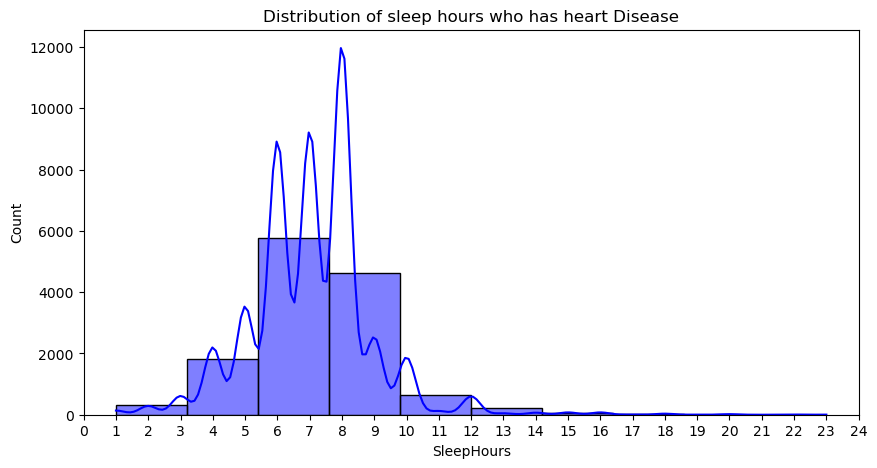

In [101]:
plt.figure(figsize=(10, 5))
sns.histplot(df['SleepHours'][df['HadHeartAttack'] == 'Yes'], bins=10, kde=True, color="blue")
plt.title('Distribution of sleep hours who has heart Disease')
plt.xticks(np.arange(0, 25, 1))
plt.xlim(0, 24)
plt.show()

In [102]:
val=df['HadDiabetes'][df['HadHeartAttack']=='Yes'].value_counts().values
index=df['HadDiabetes'][df['HadHeartAttack']=='Yes'].value_counts().index
fig = px.pie(values=val,names=index,template='plotly_dark',title='Is Diabetes effect on Heart disease ?').update_traces(textinfo='label+percent')
fig.show()

In [103]:
val=df['SmokerStatus'][df['HadHeartAttack']=='Yes'].value_counts().values
index=df['SmokerStatus'][df['HadHeartAttack']=='Yes'].value_counts().index
fig = px.pie(values=val,names=index,template='plotly_dark',title='Is Smoke effect on Heart disease ?').update_traces(textinfo='label+percent')
fig.show()

In [104]:
val=df['ECigaretteUsage'][df['HadHeartAttack']=='No'].value_counts().values
index=df['ECigaretteUsage'][df['HadHeartAttack']=='No'].value_counts().index
fig = px.pie(values=val,names=index,template='plotly_dark',title='Is E-cigarette effect on Heart disease ?').update_traces(textinfo='label+percent')
fig.show() 
## never used e-cigarettes doesnt have heart disease

In [105]:
val=df['AlcoholDrinkers'][df['HadHeartAttack']=='Yes'].value_counts().values
index=df['AlcoholDrinkers'][df['HadHeartAttack']=='Yes'].value_counts().index
fig = px.pie(values=val,names=index,template='plotly_dark',title='Is Alcohol effect on Heart disease ?').update_traces(textinfo='label+percent')
fig.show()

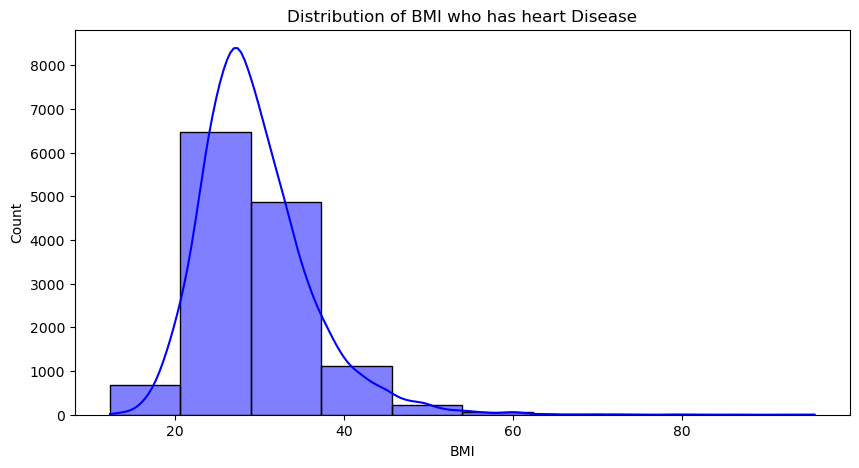

In [106]:
plt.figure(figsize=(10, 5))
sns.histplot(df['BMI'][df['HadHeartAttack'] == 'Yes'], bins=10, kde=True, color="blue")
plt.title('Distribution of BMI who has heart Disease')
plt.show()

***Encoding Categorical Columns***

In [108]:
le = LabelEncoder()

In [109]:
categorical_columns=df.select_dtypes(include='object').columns

In [110]:
categorical_columns

Index(['State', 'Sex', 'GeneralHealth', 'LastCheckupTime',
       'PhysicalActivities', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver',
       'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [111]:
for col in categorical_columns:
    df[col]=le.fit_transform(df[col])

In [112]:
df

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,0,0,4,4.0,0.0,3,1,9.0,3,0,...,1.60,71.67,27.99,0,0,1,1,1,0,0
1,0,1,4,0.0,0.0,3,1,6.0,3,0,...,1.78,95.25,30.13,0,0,1,1,2,0,0
2,0,1,4,0.0,0.0,3,0,8.0,1,0,...,1.85,108.86,31.66,1,0,0,1,0,0,2
3,0,0,1,5.0,0.0,3,1,9.0,3,0,...,1.70,90.72,31.32,0,0,1,1,0,0,2
4,0,0,2,3.0,15.0,3,1,5.0,0,0,...,1.55,79.38,33.07,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246017,48,1,4,0.0,0.0,1,1,6.0,3,0,...,1.78,102.06,32.28,1,0,0,0,2,0,0
246018,48,0,1,0.0,7.0,3,1,7.0,3,0,...,1.93,90.72,24.34,0,0,0,0,0,0,2
246019,48,1,2,0.0,15.0,3,1,7.0,0,0,...,1.68,83.91,29.86,1,1,1,1,2,0,2
246020,48,0,0,2.0,2.0,3,1,7.0,3,0,...,1.70,83.01,28.66,0,1,1,0,2,0,0


***Balance Data***

In [114]:
x=df.drop(columns=['HadHeartAttack'])
y=df['HadHeartAttack']

***Spliting***

In [116]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

***Modeling***

In [118]:
def evaluate_model(model,pred): 
    print(f'Trian Accuracy = {model.score(x_train,y_train)}')
    print(f'Test Accuracy = {model.score(x_test,y_test)}')
    print(f'classification report :\n {classification_report(y_test,pred)}')
    print('\n')
    cm=confusion_matrix(pred,y_test)
    sns.heatmap(cm,annot=True,fmt='d')
    plt.show()

In [119]:
lr=LogisticRegression(max_iter=500)

In [120]:
lr.fit(x_train,y_train)

LogisticRegression(max_iter=500)

In [121]:
y_pred_lr=lr.predict(x_test)

Trian Accuracy = 0.9479447182561862
Test Accuracy = 0.9490884702152308
classification report :
               precision    recall  f1-score   support

           0       0.96      0.99      0.97     46558
           1       0.56      0.25      0.34      2645

    accuracy                           0.95     49203
   macro avg       0.76      0.62      0.66     49203
weighted avg       0.94      0.95      0.94     49203





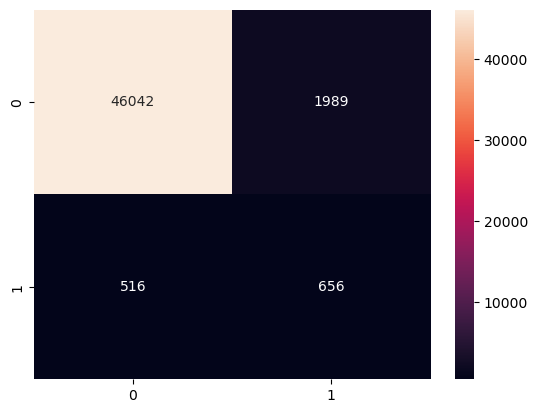

In [122]:
evaluate_model(lr,y_pred_lr)

In [123]:
rf=RandomForestClassifier(n_estimators=100,random_state=42)

In [124]:
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [125]:
y_pred_rf=rf.predict(x_test)

Trian Accuracy = 0.9999491895737005
Test Accuracy = 0.9486210190435542
classification report :
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     46558
           1       0.57      0.18      0.27      2645

    accuracy                           0.95     49203
   macro avg       0.76      0.58      0.62     49203
weighted avg       0.93      0.95      0.94     49203





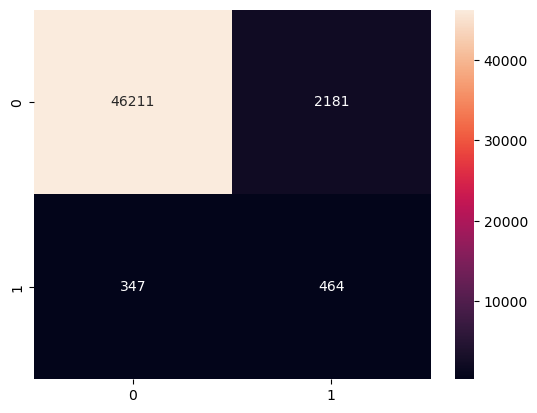

In [126]:
evaluate_model(rf,y_pred_rf)

In [127]:
dt=DecisionTreeClassifier()

In [128]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [129]:
y_pred_dt=dt.predict(x_test)

Trian Accuracy = 1.0
Test Accuracy = 0.9131963498160681
classification report :
               precision    recall  f1-score   support

           0       0.96      0.95      0.95     46558
           1       0.25      0.30      0.27      2645

    accuracy                           0.91     49203
   macro avg       0.60      0.63      0.61     49203
weighted avg       0.92      0.91      0.92     49203





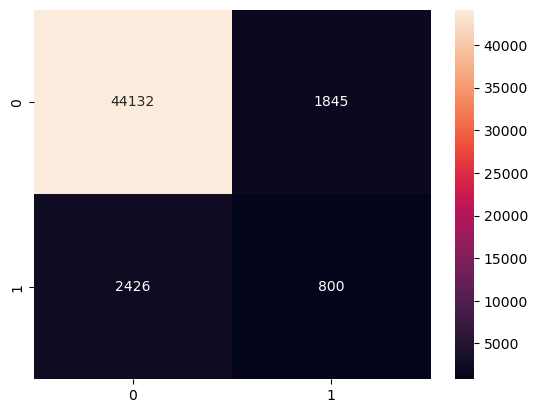

In [130]:
evaluate_model(dt,y_pred_dt)